In [3]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats


Text(0.5,1,'Domain Integrated TKE')

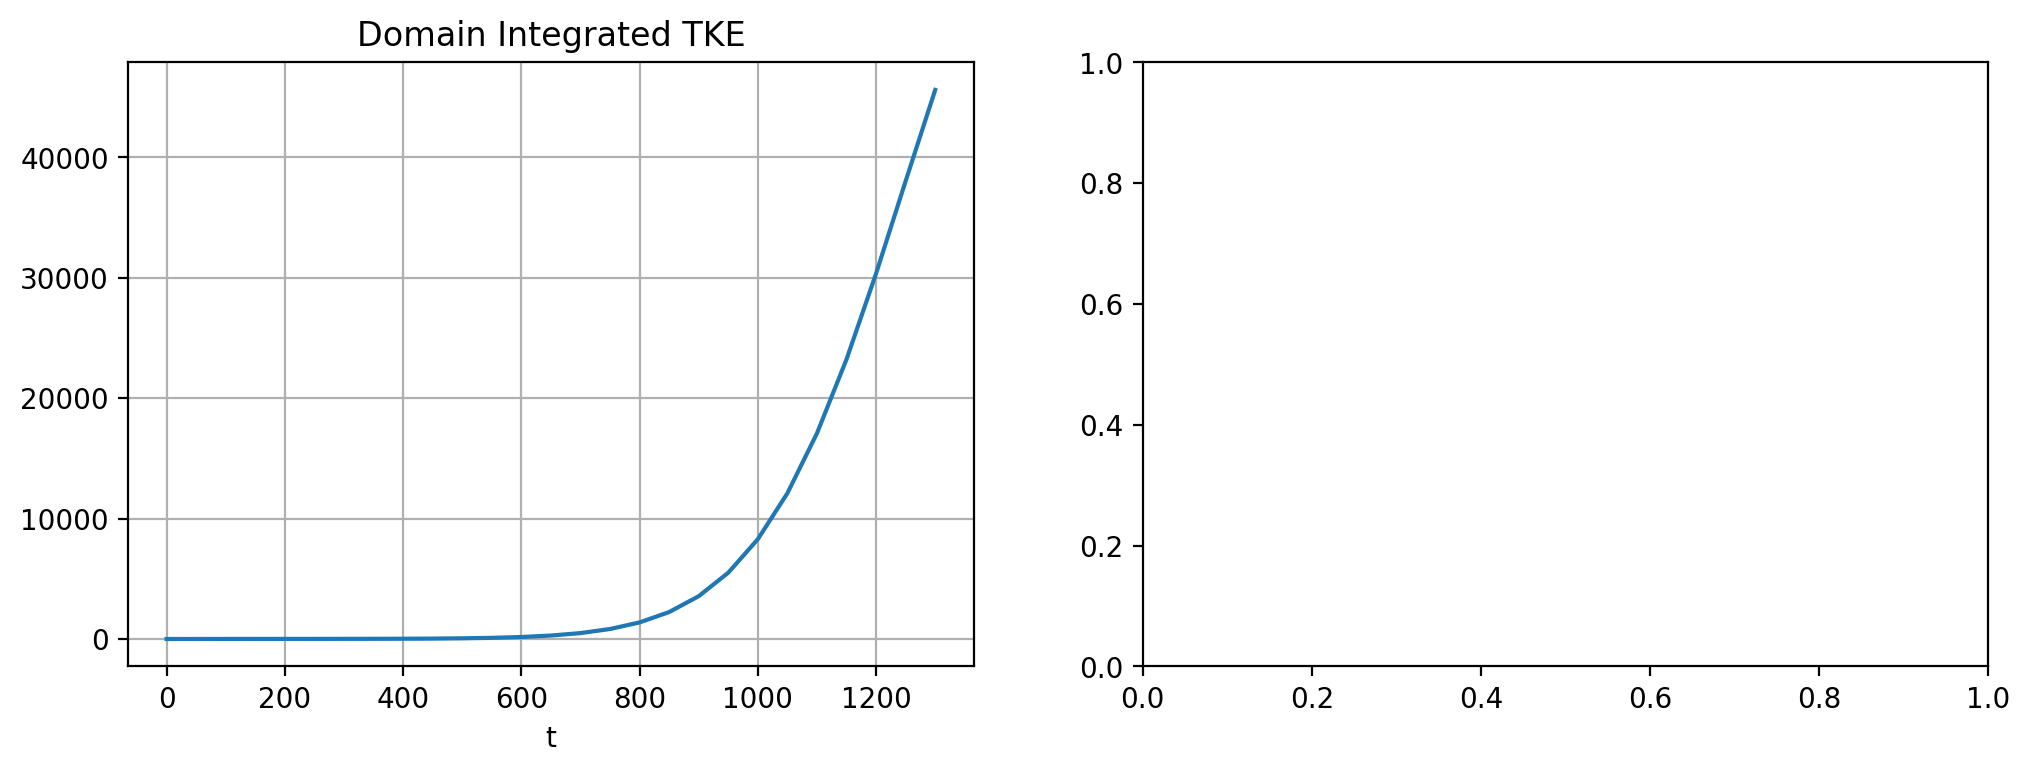

In [7]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc24/rr1/512x512x256'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128'
filename_prefix = directory+'/shearlayer_'

# TKE
fname = filename_prefix+'TKE_growth.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

nstats=2
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
tke = dat[:,1]

# Plotting
fig, axarr = plt.subplots(1,2, figsize=(12,4), dpi=200) 
axarr[0].plot(time,tke/tke[0]); 
axarr[0].grid(True)
axarr[0].set_xlabel('t')
axarr[0].set_title('Domain Integrated TKE')